### Stock Prediction using fb Prophet

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

It forecasts time series data based on an additive model in which non-linear trends are fit with yearly, weekly, or daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well . Prophet is open source software released by Facebook’s core Data Science team.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from prophet import Prophet
import yfinance as yf



In [2]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'IBM'

# Fetch the historical data
df_Stock = yf.download(ticker_symbol, start='2004-01-02', progress=False)
Stock_info = yf.Ticker(ticker_symbol).info

# Rename columns
df_Stock = df_Stock.rename(columns={
    'Open': 'Open', 
    'High': 'High', 
    'Low': 'Low', 
    'Close': 'Close', 
    'Volume': 'Volume'
})
df_Stock = df_Stock.rename_axis('Date')

# Sort by date
Stock = df_Stock.sort_index(ascending=True)

# Slice the data for 15 years
Stock = Stock.loc['2004-01-02':]
Stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,88.776291,88.957932,87.189293,87.523903,48.429550,5572879
2004-01-05,87.954109,88.996178,87.954109,88.957932,49.223057,5519010
2004-01-06,88.145317,89.091782,88.087952,88.967499,49.228348,4581480
2004-01-07,89.043976,89.273422,88.403442,88.699806,49.080212,5154270
2004-01-08,89.110901,89.110901,87.982796,88.948372,49.217751,6464071
...,...,...,...,...,...,...
2024-07-23,184.360001,185.380005,183.009995,184.100006,184.100006,2180200
2024-07-24,184.139999,185.070007,183.149994,184.020004,184.020004,6962100
2024-07-25,186.800003,196.259995,185.300003,191.979996,191.979996,9532800


In [3]:
Stock = Stock.drop(columns=['Open', 'High', 'Low', 'Volume'])

In [4]:
Stock.index = pd.to_datetime(Stock.index)

In [5]:
Stock.info()
#NFLX.resample('D').ffill()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5177 entries, 2004-01-02 to 2024-07-29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      5177 non-null   float64
 1   Adj Close  5177 non-null   float64
dtypes: float64(2)
memory usage: 121.3 KB


In [6]:
Stock = Stock.reset_index()
Stock

,Date,Close,Adj Close
0,2004-01-02,87.523903,48.429550
1,2004-01-05,88.957932,49.223057
2,2004-01-06,88.967499,49.228348
3,2004-01-07,88.699806,49.080212
4,2004-01-08,88.948372,49.217751
...,...,...,...
5172,2024-07-23,184.100006,184.100006
5173,2024-07-24,184.020004,184.020004
5174,2024-07-25,191.979996,191.979996
5175,2024-07-26,191.750000,191.750000


In [7]:
# Rename columns for Prophet
Stock = Stock.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize Prophet model
prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model.add_country_holidays(country_name='US')
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [8]:
prophet_model.fit(Stock)

22:23:57 - cmdstanpy - INFO - Chain [1] start processing
22:24:00 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = prophet_model.make_future_dataframe(periods=30)
future.tail()

,ds
5202,2024-08-24
5203,2024-08-25
5204,2024-08-26
5205,2024-08-27
5206,2024-08-28


In [10]:
forcast = prophet_model.predict(future)
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),Christmas Day (observed)_lower,Christmas Day (observed)_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Independence Day (observed),Independence Day (observed)_lower,Independence Day (observed)_upper,Juneteenth National Independence Day,Juneteenth National Independence Day_lower,Juneteenth National Independence Day_upper,Juneteenth National Independence Day (observed),Juneteenth National Independence Day (observed)_lower,Juneteenth National Independence Day (observed)_upper,Labor Day,Labor Day_lower,Labor Day_upper,Martin Luther King Jr. Day,Martin Luther King Jr. Day_lower,Martin Luther King Jr. Day_upper,Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,New Year's Day (observed),New Year's Day (observed)_lower,New Year's Day (observed)_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Veterans Day (observed),Veterans Day (observed)_lower,Veterans Day (observed)_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5202,2024-08-24,162.379904,151.057255,173.636285,162.379904,162.379904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187075,0.187075,0.187075,1.179283,1.179283,1.179283,0.0,0.0,0.0,0.188007,0.188007,0.188007,-0.147411,-0.147411,-0.147411,-1.032804,-1.032804,-1.032804,0.0,0.0,0.0,162.566979
5203,2024-08-25,162.412299,151.653487,173.509874,162.412299,162.412299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.032947,-0.032947,-0.032947,1.179283,1.179283,1.179283,0.0,0.0,0.0,-0.047362,-0.047362,-0.047362,-0.147411,-0.147411,-0.147411,-1.017458,-1.017458,-1.017458,0.0,0.0,0.0,162.379352
5204,2024-08-26,162.444694,151.429694,173.324041,162.444694,162.444694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.042287,-0.042287,-0.042287,1.179283,1.179283,1.179283,0.0,0.0,0.0,-0.268264,-0.268264,-0.268264,0.040313,0.040313,0.040313,-0.993619,-0.993619,-0.993619,0.0,0.0,0.0,162.402407
5205,2024-08-27,162.477089,150.461085,174.682400,162.477089,162.477089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069402,0.069402,0.069402,1.179283,1.179283,1.179283,0.0,0.0,0.0,-0.301508,-0.301508,-0.301508,0.154801,0.154801,0.154801,-0.963174,-0.963174,-0.963174,0.0,0.0,0.0,162.546491
5206,2024-08-28,162.509484,151.127581,173.828146,162.509484,162.509484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161678,0.161678,0.161678,1.179283,1.179283,1.179283,0.0,0.0,0.0,-0.159427,-0.159427,-0.159427,0.069726,0.069726,0.069726,-0.927903,-0.927903,-0.927903,0.0,0.0,0.0,162.671162


c:\Users\ashok\Desktop\SPPO\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\ashok\Desktop\SPPO\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


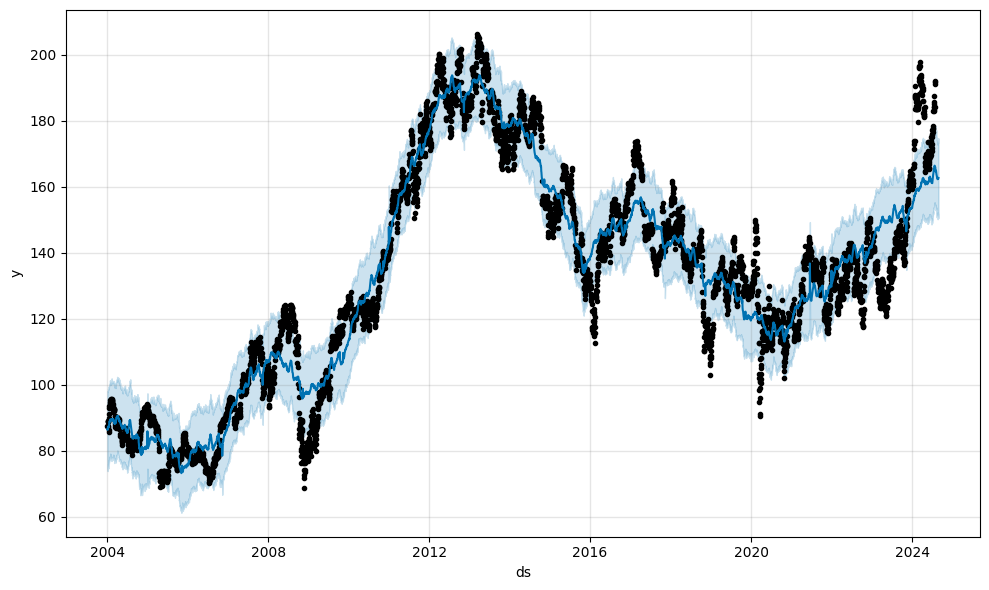

In [11]:
prophet_model.plot(forcast);

If you want to visualize the individual forecast components, we can use Prophet’s built-in plot_components method like below

c:\Users\ashok\Desktop\SPPO\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\ashok\Desktop\SPPO\.venv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\ashok\Desktop\SPPO\.venv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

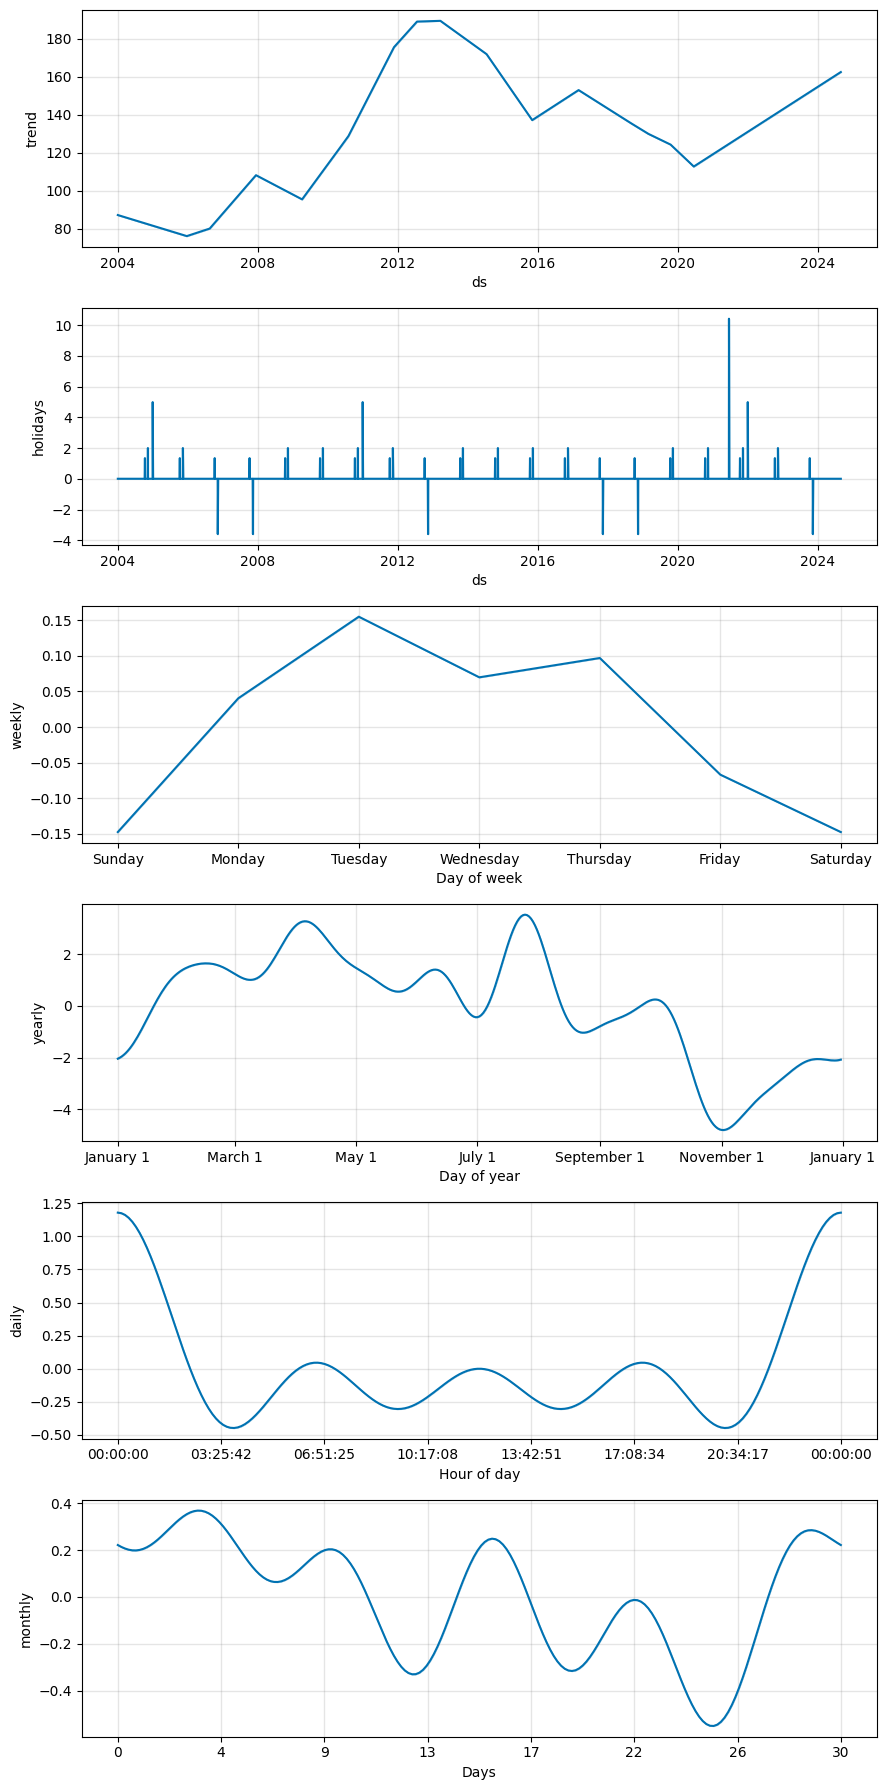

In [12]:
prophet_model.plot_components(forcast);

In [13]:
forcast.shape

(5207, 76)

In [14]:
forcast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5202,2024-08-24,162.566979,151.057255,173.636285
5203,2024-08-25,162.379352,151.653487,173.509874
5204,2024-08-26,162.402407,151.429694,173.324041
5205,2024-08-27,162.546491,150.461085,174.682400
5206,2024-08-28,162.671162,151.127581,173.828146


### Prediction Performance

The performance_metrics utility can be used to compute some useful statistics of the prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff (how far into the future the prediction was). The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), and coverage of the yhat_lower and yhat_upper estimates. 

In [15]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(prophet_model, horizon='180 days')
df_cv.head()

  0%|          | 0/76 [00:00<?, ?it/s]22:24:03 - cmdstanpy - INFO - Chain [1] start processing
22:24:03 - cmdstanpy - INFO - Chain [1] done processing
  1%|▏         | 1/76 [00:00<00:29,  2.58it/s]22:24:03 - cmdstanpy - INFO - Chain [1] start processing
22:24:03 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 2/76 [00:00<00:28,  2.64it/s]22:24:04 - cmdstanpy - INFO - Chain [1] start processing
22:24:04 - cmdstanpy - INFO - Chain [1] done processing
  4%|▍         | 3/76 [00:01<00:30,  2.42it/s]22:24:04 - cmdstanpy - INFO - Chain [1] start processing
22:24:04 - cmdstanpy - INFO - Chain [1] done processing
  5%|▌         | 4/76 [00:01<00:33,  2.17it/s]22:24:05 - cmdstanpy - INFO - Chain [1] start processing
22:24:05 - cmdstanpy - INFO - Chain [1] done processing
  7%|▋         | 5/76 [00:02<00:33,  2.15it/s]22:24:05 - cmdstanpy - INFO - Chain [1] start processing
22:24:05 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 6/76 [00:02<00:34,  2.01it/s]22:24:06

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-08-09,79.577608,77.611917,81.451740,79.827919,2005-08-08
1,2005-08-10,79.563879,77.747161,81.472397,78.413002,2005-08-08
2,2005-08-11,79.602717,77.509444,81.555434,79.024857,2005-08-08
3,2005-08-12,79.562341,77.631855,81.346596,78.575523,2005-08-08
4,2005-08-15,79.859892,77.965622,81.834925,78.871895,2005-08-08


In [16]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-08-09,79.577608,77.611917,81.451740,79.827919,2005-08-08
1,2005-08-10,79.563879,77.747161,81.472397,78.413002,2005-08-08
2,2005-08-11,79.602717,77.509444,81.555434,79.024857,2005-08-08
3,2005-08-12,79.562341,77.631855,81.346596,78.575523,2005-08-08
4,2005-08-15,79.859892,77.965622,81.834925,78.871895,2005-08-08
...,...,...,...,...,...,...
9419,2024-07-23,150.603164,139.806652,162.957926,184.100006,2024-01-31
9420,2024-07-24,150.707446,138.739261,162.145068,184.020004,2024-01-31
9421,2024-07-25,150.652415,138.788618,161.926694,191.979996,2024-01-31
9422,2024-07-26,150.329634,138.518661,161.580313,191.750000,2024-01-31


In [17]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,18 days,156.646245,12.515840,9.265523,0.069368,0.052584,0.070139,0.512939
1,19 days,159.074305,12.612466,9.421128,0.070391,0.053810,0.071255,0.499900
2,20 days,163.948781,12.804249,9.619615,0.071889,0.055400,0.072690,0.491467
3,21 days,168.672792,12.987409,9.774626,0.072888,0.055479,0.073590,0.485914
4,22 days,174.698031,13.217338,9.928307,0.074144,0.055400,0.074679,0.484548


In [18]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,18 days,156.646245,12.515840,9.265523,0.069368,0.052584,0.070139,0.512939
1,19 days,159.074305,12.612466,9.421128,0.070391,0.053810,0.071255,0.499900
2,20 days,163.948781,12.804249,9.619615,0.071889,0.055400,0.072690,0.491467
3,21 days,168.672792,12.987409,9.774626,0.072888,0.055479,0.073590,0.485914
4,22 days,174.698031,13.217338,9.928307,0.074144,0.055400,0.074679,0.484548
...,...,...,...,...,...,...,...,...
158,176 days,453.870937,21.304247,17.179620,0.132266,0.109449,0.134111,0.370488
159,177 days,454.537437,21.319884,17.222954,0.132995,0.110269,0.134857,0.372264
160,178 days,464.387844,21.549660,17.422413,0.134569,0.111330,0.136855,0.369885
161,179 days,475.027213,21.795119,17.639361,0.136329,0.111330,0.139000,0.367549


c:\Users\ashok\Desktop\SPPO\.venv\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\ashok\Desktop\SPPO\.venv\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


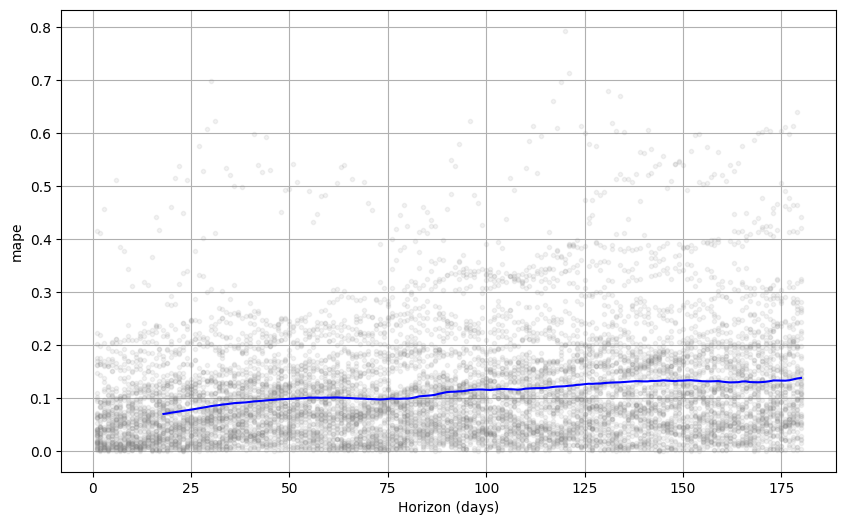

In [19]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')